# read HPLC DATA from netcdf files

In [1]:
#install.packages("ncdf4")
require(ncdf4, warn.conflicts = FALSE);
require(ggplot2, warn.conflicts = FALSE);
require(cowplot, warn.conflicts = FALSE);

Loading required package: ncdf4
Loading required package: ggplot2
Loading required package: cowplot

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [2]:
# open a NetCDF file
HPLC_bbrs <- nc_open("../VeryNEWESTCariacoData/HPLC/hplc_bbrs.netcdf")

print(HPLC_bbrs)

File ../VeryNEWESTCariacoData/HPLC/hplc_bbrs.netcdf (NC_FORMAT_CLASSIC):

     77 variables (excluding dimension variables):
        char Cruise_ID1[maxlen_,unlimited]   
        char Cruise_ID2[maxlen_,unlimited]   
        double Cruise_number[unlimited]   
        double leg[unlimited]   
        double cast[unlimited]   
        double Date[unlimited]   
        char Analyzed_by[maxlen_,unlimited]   
        double lon_n[unlimited]   
        double lat_n[unlimited]   
        double lon[unlimited]   
        double lat[unlimited]   
        double year[unlimited]   
        double month[unlimited]   
        double day[unlimited]   
        double depth_bottom[unlimited]   
        char Date_time_local[maxlen_,unlimited]   
        char time_start_local[maxlen_,unlimited]   
        char time_end_local[maxlen_,unlimited]   
        char time_start_UTC[maxlen_,unlimited]   
        char time_end_UTC[maxlen_,unlimited]   
        char Date_time_UTC[maxlen_,unlimited]   
        char

# Read entire ncdf file to r DataFrame

In [3]:
length(1:HPLC_bbrs$dim$unlimited$len)

length(ncvar_get(HPLC_bbrs, attributes(HPLC_bbrs$var)$names[1]))

[1] 246

[1] 246

In [4]:
HPLC_bbrs_df <- data.frame("Num" = 1:HPLC_bbrs$dim$unlimited$len)
print('start')
for(i in 1:HPLC_bbrs$nvars){
    print(i)
    HPLC_bbrs_df[paste(attributes(HPLC_bbrs$var)$names[i])] <- ncvar_get(HPLC_bbrs, attributes(HPLC_bbrs$var)$names[i])
}
print('done reading')
head(HPLC_bbrs_df)

[1] "start"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] "done reading"


,Num,Cruise_ID1,Cruise_ID2,Cruise_number,leg,cast,Date,Analyzed_by,lon_n,lat_n,⋯,TChl_Tcar,PPC_Tpg,PSP_Tpg,TChla_Tpg,mPF,nPF,pPF,Fluor_Chl_a,Fluor_Phaeo,Comments
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,1,93HG_002,CAR-002,2,1,2,19951213,Bermuda biological Research Station (Cathy Rathburn),-64.67,10.5,⋯,,,,,,,,0.12,0.08,The samples thawed in transport and threrefore the data may not be reliable (although it does not look too bad).
2,2,93HG_002,CAR-002,2,1,2,19951213,Bermuda biological Research Station (Cathy Rathburn),-64.67,10.5,⋯,,,,,,,,0.15,0.11,The samples thawed in transport and threrefore the data may not be reliable (although it does not look too bad).
3,3,93HG_002,CAR-002,2,1,2,19951213,Bermuda biological Research Station (Cathy Rathburn),-64.67,10.5,⋯,,,,,,,,0.18,0.14,The samples thawed in transport and threrefore the data may not be reliable (although it does not look too bad).
4,4,93HG_002,CAR-002,2,1,2,19951213,Bermuda biological Research Station (Cathy Rathburn),-64.67,10.5,⋯,,,,,,,,0.38,0.42,The samples thawed in transport and threrefore the data may not be reliable (although it does not look too bad).
5,5,93HG_002,CAR-002,2,1,2,19951213,Bermuda biological Research Station (Cathy Rathburn),-64.67,10.5,⋯,,,,,,,,0.10,0.20,The samples thawed in transport and threrefore the data may not be reliable (although it does not look too bad).
6,6,93HG_002,CAR-002,2,1,2,19951213,Bermuda biological Research Station (Cathy Rathburn),-64.67,10.5,⋯,,,,,,,,0.10,0.20,The samples thawed in transport and threrefore the data may not be reliable (although it does not look too bad).


# plot data coverage

In [6]:
# convert date to readable format
HPLC_bbrs_df$Datetime_local <- as.POSIXct(as.character(HPLC_bbrs_df$Date_time_local), format="%Y-%m-%dT%H:%M")

In [8]:
#convert abundances to numbers
HPLC_bbrs_df$Tot_Chl_a <- as.numeric(HPLC_bbrs_df$Tot_Chl_a)

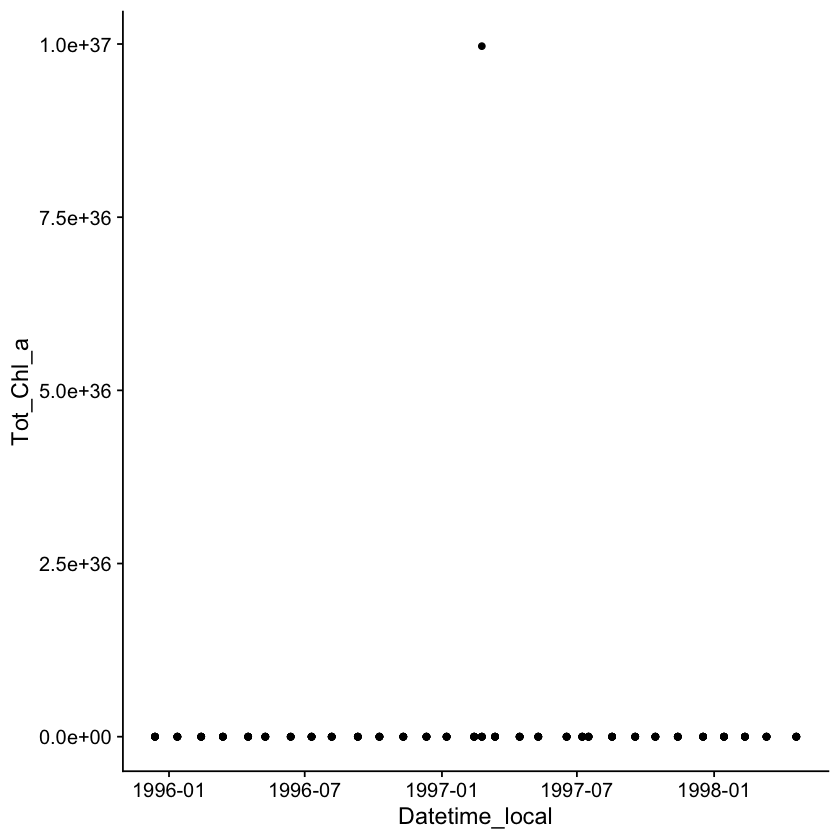

In [9]:
ggplot(data=HPLC_bbrs_df)+geom_point(aes(x=Datetime_local, y=Tot_Chl_a))+
theme_cowplot()

In [ ]:
# read ngsfc

In [10]:
# open a NetCDF file
HPLC_ngsfc <- nc_open("../VeryNEWESTCariacoData/HPLC/hplc_ngsfc.netcdf")

print(HPLC_ngsfc)

File ../VeryNEWESTCariacoData/HPLC/hplc_ngsfc.netcdf (NC_FORMAT_CLASSIC):

     77 variables (excluding dimension variables):
        char Cruise_ID1[maxlen_,unlimited]   
        char Cruise_ID2[maxlen_,unlimited]   
        double Cruise_number[unlimited]   
        double leg[unlimited]   
        double cast[unlimited]   
        double Date[unlimited]   
        char Analyzed_by[maxlen_,unlimited]   
        double lon_n[unlimited]   
        double lat_n[unlimited]   
        double lon[unlimited]   
        double lat[unlimited]   
        double year[unlimited]   
        double month[unlimited]   
        double day[unlimited]   
        double depth_bottom[unlimited]   
        char Date_time_local[maxlen_,unlimited]   
        char time_start_local[maxlen_,unlimited]   
        char time_end_local[maxlen_,unlimited]   
        char time_start_UTC[maxlen_,unlimited]   
        char time_end_UTC[maxlen_,unlimited]   
        char Date_time_UTC[maxlen_,unlimited]   
        cha

# Read entire ncdf file to r DataFrame

In [11]:
length(1:HPLC_ngsfc$dim$unlimited$len)

length(ncvar_get(HPLC_ngsfc, attributes(HPLC_ngsfc$var)$names[1]))

[1] 567

[1] 567

In [12]:
HPLC_ngsfc_df <- data.frame("Num" = 1:HPLC_ngsfc$dim$unlimited$len)
print('start')
for(i in 1:HPLC_ngsfc$nvars){
    print(i)
    HPLC_ngsfc_df[paste(attributes(HPLC_ngsfc$var)$names[i])] <- ncvar_get(HPLC_ngsfc, attributes(HPLC_ngsfc$var)$names[i])
}
print('done reading')
head(HPLC_ngsfc_df)

[1] "start"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] "done reading"


,Num,Cruise_ID1,Cruise_ID2,Cruise_number,leg,cast,Date,Analyzed_by,lon_n,lat_n,⋯,TChl_Tcar,PPC_Tpg,PSP_Tpg,TChla_Tpg,mPF,nPF,pPF,Fluor_Chl_a,Fluor_Phaeo,Comments
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,1,93HG_176,CAR-176,176,2,4,20110111,NASA Goddard Space Flight Center (GSFC; Crystal Thomas),-64.67,10.5,⋯,2.20,0.04,0.96,0.54,,,,0.95,0.59,None
2,2,93HG_176,CAR-176,176,2,4,20110111,NASA Goddard Space Flight Center (GSFC; Crystal Thomas),-64.67,10.5,⋯,2.20,0.04,0.96,0.54,,,,0.95,0.59,None
3,3,93HG_176,CAR-176,176,2,4,20110111,NASA Goddard Space Flight Center (GSFC; Crystal Thomas),-64.67,10.5,⋯,2.05,0.05,0.95,0.52,,,,0.90,0.64,None
4,4,93HG_176,CAR-176,176,2,4,20110111,NASA Goddard Space Flight Center (GSFC; Crystal Thomas),-64.67,10.5,⋯,2.09,0.04,0.96,0.52,,,,0.89,0.69,None
5,5,93HG_176,CAR-176,176,2,4,20110111,NASA Goddard Space Flight Center (GSFC; Crystal Thomas),-64.67,10.5,⋯,3.18,0.02,0.98,0.59,,,,8.23,5.29,None
6,6,93HG_176,CAR-176,176,2,4,20110111,NASA Goddard Space Flight Center (GSFC; Crystal Thomas),-64.67,10.5,⋯,2.85,0.02,0.98,0.58,,,,-9999.00,-9999.00,None


# plot data coverage

In [13]:
# convert date to readable format
HPLC_ngsfc_df$Datetime_local <- as.POSIXct(as.character(HPLC_ngsfc_df$Date_time_local), format="%Y-%m-%dT%H:%M")

In [14]:
#convert abundances to numbers
HPLC_ngsfc_df$Tot_Chl_a <- as.numeric(HPLC_ngsfc_df$Tot_Chl_a)

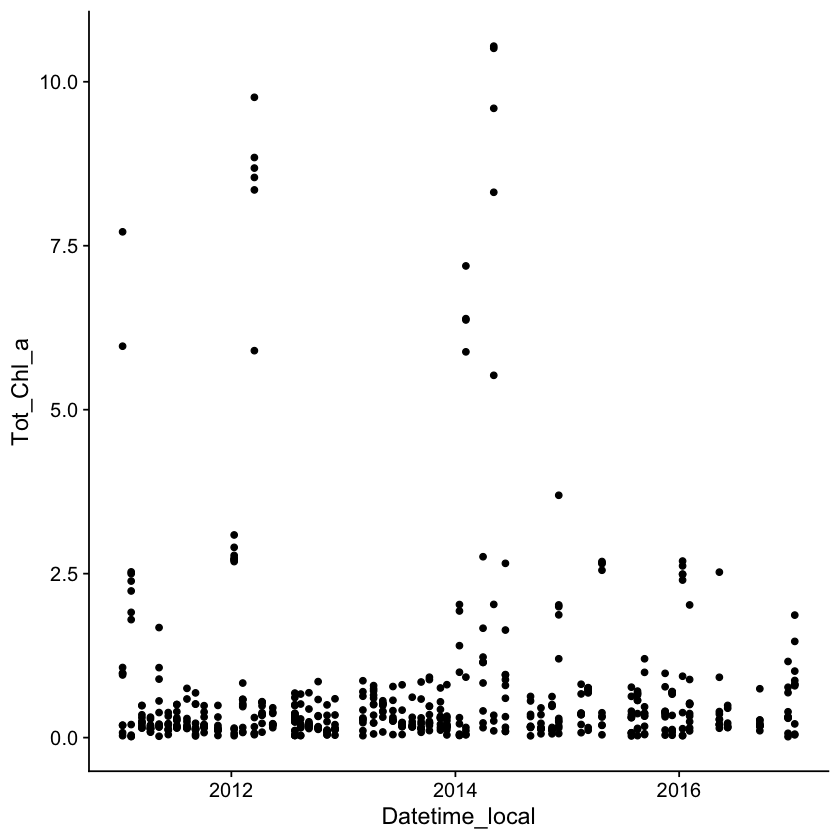

In [15]:
ggplot(data=HPLC_ngsfc_df)+geom_point(aes(x=Datetime_local, y=Tot_Chl_a))+
theme_cowplot()

# read another HPLC ncdf file

In [11]:
length(1:HPLC_ngsfc$dim$unlimited$len)

length(ncvar_get(HPLC_ngsfc, attributes(HPLC_ngsfc$var)$names[1]))

[1] 567

[1] 567

In [12]:
HPLC_ngsfc_df <- data.frame("Num" = 1:HPLC_ngsfc$dim$unlimited$len)
print('start')
for(i in 1:HPLC_ngsfc$nvars){
    print(i)
    HPLC_ngsfc_df[paste(attributes(HPLC_ngsfc$var)$names[i])] <- ncvar_get(HPLC_ngsfc, attributes(HPLC_ngsfc$var)$names[i])
}
print('done reading')
head(HPLC_ngsfc_df)

[1] "start"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] "done reading"


,Num,Cruise_ID1,Cruise_ID2,Cruise_number,leg,cast,Date,Analyzed_by,lon_n,lat_n,⋯,TChl_Tcar,PPC_Tpg,PSP_Tpg,TChla_Tpg,mPF,nPF,pPF,Fluor_Chl_a,Fluor_Phaeo,Comments
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,1,93HG_176,CAR-176,176,2,4,20110111,NASA Goddard Space Flight Center (GSFC; Crystal Thomas),-64.67,10.5,⋯,2.20,0.04,0.96,0.54,,,,0.95,0.59,None
2,2,93HG_176,CAR-176,176,2,4,20110111,NASA Goddard Space Flight Center (GSFC; Crystal Thomas),-64.67,10.5,⋯,2.20,0.04,0.96,0.54,,,,0.95,0.59,None
3,3,93HG_176,CAR-176,176,2,4,20110111,NASA Goddard Space Flight Center (GSFC; Crystal Thomas),-64.67,10.5,⋯,2.05,0.05,0.95,0.52,,,,0.90,0.64,None
4,4,93HG_176,CAR-176,176,2,4,20110111,NASA Goddard Space Flight Center (GSFC; Crystal Thomas),-64.67,10.5,⋯,2.09,0.04,0.96,0.52,,,,0.89,0.69,None
5,5,93HG_176,CAR-176,176,2,4,20110111,NASA Goddard Space Flight Center (GSFC; Crystal Thomas),-64.67,10.5,⋯,3.18,0.02,0.98,0.59,,,,8.23,5.29,None
6,6,93HG_176,CAR-176,176,2,4,20110111,NASA Goddard Space Flight Center (GSFC; Crystal Thomas),-64.67,10.5,⋯,2.85,0.02,0.98,0.58,,,,-9999.00,-9999.00,None


# plot data coverage

In [13]:
# convert date to readable format
HPLC_ngsfc_df$Datetime_local <- as.POSIXct(as.character(HPLC_ngsfc_df$Date_time_local), format="%Y-%m-%dT%H:%M")

In [14]:
#convert abundances to numbers
HPLC_ngsfc_df$Tot_Chl_a <- as.numeric(HPLC_ngsfc_df$Tot_Chl_a)

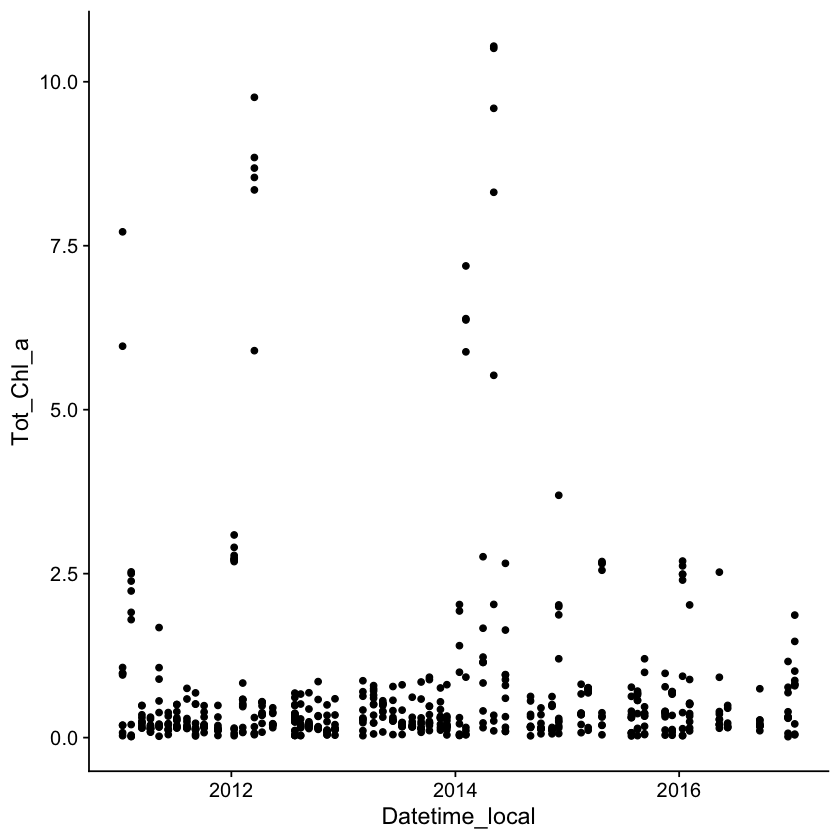

In [15]:
ggplot(data=HPLC_ngsfc_df)+geom_point(aes(x=Datetime_local, y=Tot_Chl_a))+
theme_cowplot()